# Polynomial regression for car price prediction

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load data

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filename, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Check data

In [3]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# v1
# Check data
# Check columns for missing data - search for symbols like:
# '', NaN, '?', '-'

# from collections import defaultdict

# mis_symbols = ('', 'N/A', 'NaN', '?', '-', '0', 0)
# mis_dict = defaultdict(int)

# df_len = len(df)
# for col in df:
#     if df[col].dtypes == 'object':
#         for sym in mis_symbols[:-1]:
#             for i in range(df_len):
#                 if df[col][i] == sym:
#                     mis_dict[f"{col} - {sym}"] += 1
#     elif df[col].dtypes in ('float64', 'int64'):
#         for i in range(df_len):
#             if df[col][i] == 0:
#                 mis_dict[f"{col} - digit 0"] += 1

# for k, v in mis_dict.items():
#     print(f"{k:<25} {v:<3} {100*v/df_len:.1f}%")

### Numerical columns - Check data
Check columns for mising data - search for symbols like:  
'', NaN, '?', '-'

In [6]:
# v2

mis_symbols = ('', 'N/A', 'NaN', '?', '-', '0', 0)
for col in df:
    for sym in mis_symbols:
        mis_sum = (df[col] == sym).sum()
        if mis_sum > 0:
            print(f"{col:<20} {sym:<3} {mis_sum:<3}{100*mis_sum/len(df):.1f}%")

symboling            0   67 32.7%
normalized-losses    ?   41 20.0%
num-of-doors         ?   2  1.0%
bore                 ?   4  2.0%
stroke               ?   4  2.0%
horsepower           ?   2  1.0%
peak-rpm             ?   2  1.0%
price                ?   4  2.0%


Check all columns with missing data for the most frequent values

In [7]:
mis_cols = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in mis_cols:
    print(col)
    print(df[col].value_counts().head(3))
    print()

normalized-losses
?      41
161    11
91      8
Name: normalized-losses, dtype: int64

num-of-doors
four    114
two      89
?         2
Name: num-of-doors, dtype: int64

bore
3.62    23
3.19    20
3.15    15
Name: bore, dtype: int64

stroke
3.40    20
3.23    14
3.15    14
Name: stroke, dtype: int64

horsepower
68    19
70    11
69    10
Name: horsepower, dtype: int64

peak-rpm
5500    37
4800    36
5000    27
Name: peak-rpm, dtype: int64



### Numerical columns - Replace data
Replace all '?' with np.NaN

In [8]:
import numpy as np
df.replace(to_replace='?', value=np.NaN, inplace=True)

Replace np.NaN to 'four' in num-of-doors as it's the most frequent value

In [9]:
df['num-of-doors'].replace(to_replace=np.NaN, value='four', inplace=True)
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

Replace values to means:
- change column type from object to float
- calc the mean
- swap np.NaN to mean

In [10]:
mis_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in mis_cols:
    df[col] = df[col].astype(float)
    mean = df[col].mean(axis=0)
    df[col].replace(to_replace=np.NaN, value=mean, inplace=True)
df[mis_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   bore               205 non-null    float64
 2   stroke             205 non-null    float64
 3   horsepower         205 non-null    float64
 4   peak-rpm           205 non-null    float64
dtypes: float64(5)
memory usage: 8.1 KB


Drop rows with '?' from price as we plan to predict it  
- df.dropna  
- convert data type to float  

In [11]:
df.dropna(subset=['price'], axis=0, inplace=True)
df['price'] = df['price'].astype(float)
df['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 201 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


### Numerical columns - check correlation between numerical columns and price

In [12]:
a = list(df.select_dtypes(exclude='object'))
a.remove('price')
print(a)
print(sorted(a))


['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
['bore', 'city-mpg', 'compression-ratio', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'normalized-losses', 'peak-rpm', 'stroke', 'symboling', 'wheel-base', 'width']


In [13]:
# from scipy import stats
# p_values = list()
# cols = list(df.select_dtypes(exclude='object'))
# cols.remove('price')
# for col in sorted(cols):
#     fig, ax = plt.subplots()
#     sns.regplot(x=col, y='price', data=df, x_ci='sd')
#     pearson_coef, p_value_p = stats.pearsonr(df[col], df['price'])
#     kendall_coef, p_value_k = stats.kendalltau(df[col], df['price'])
#     spearman_coef, p_value_s = stats.spearmanr(df[col], df['price'])
#     annotation = (
#         f"pearson_coef:  {pearson_coef:9.2e}  p_value_p: {p_value_p:.2e}\n"
#         f"kendall_coef:  {kendall_coef:9.2e}  p_value_k: {p_value_k:.2e}\n"
#         f"spearman_coef: {spearman_coef:9.2e}  p_value_s: {p_value_s:.2e}\n"
#         )
#     plt.text(s=annotation, x=0.00, y=1, transform=ax.transAxes, fontfamily='monospace')
#     plt.show()
#     plt.close()
#     min_p = min(p_value_p, p_value_k, p_value_s)
#     if min_p < 0.001:
#         p_values.append({col : min_p})
# print('Statistically significant correlations (p_value < 0.001) price vs:')
# for p in p_values:
#     for k, v in p.items():
#         print(f"{k:<25} {v:.2e}")

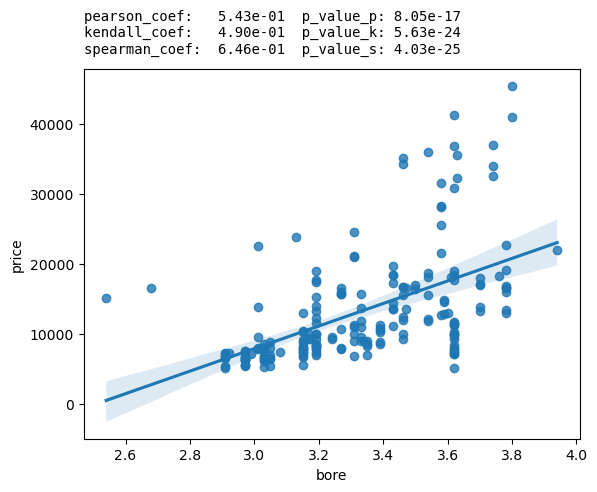

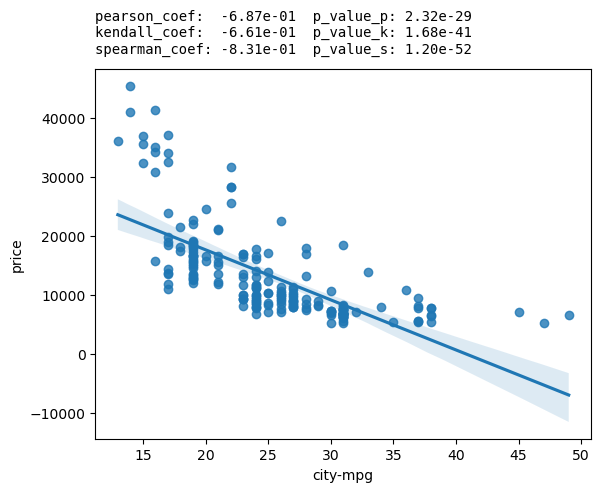

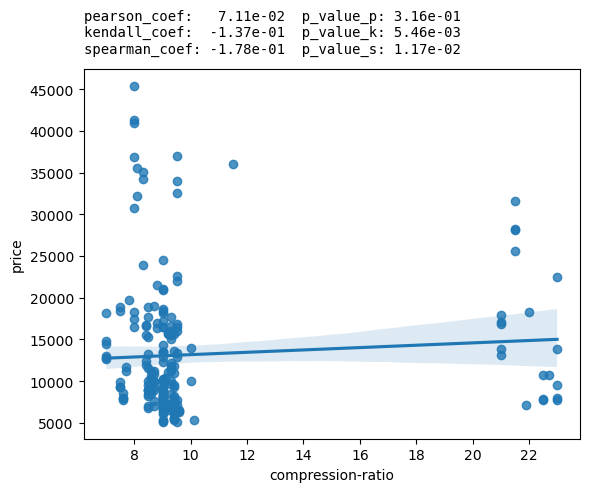

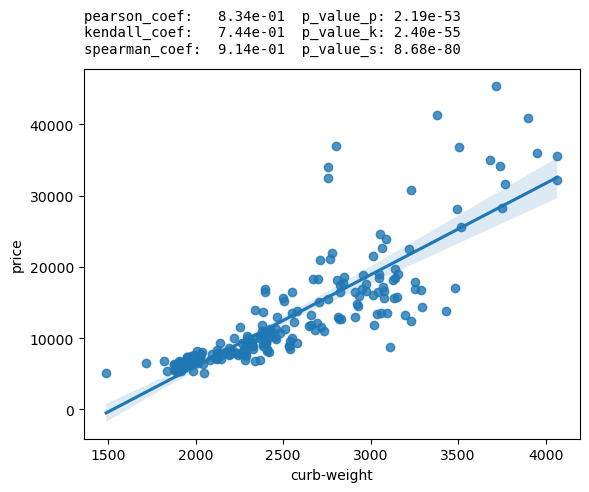

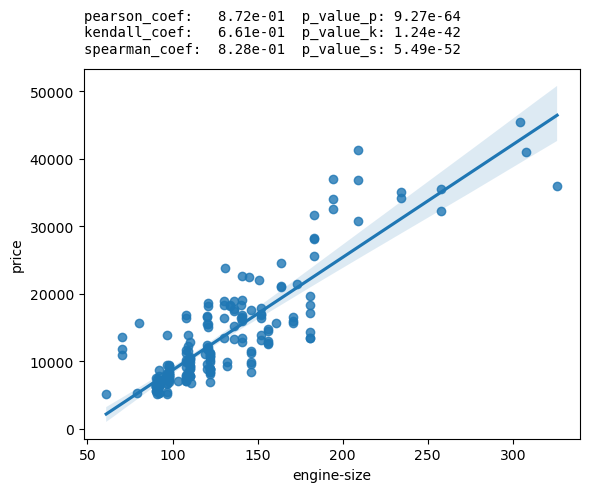

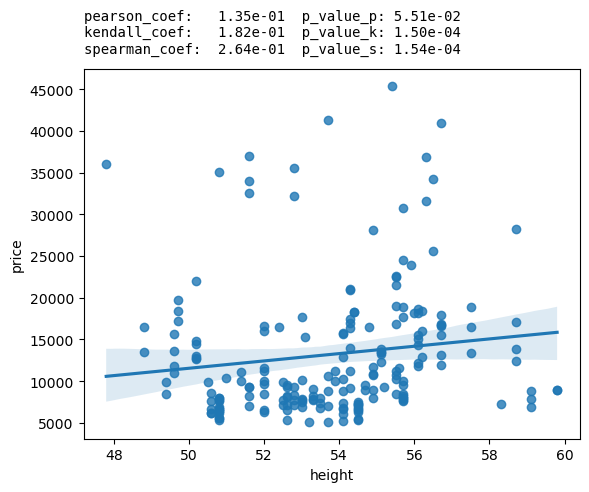

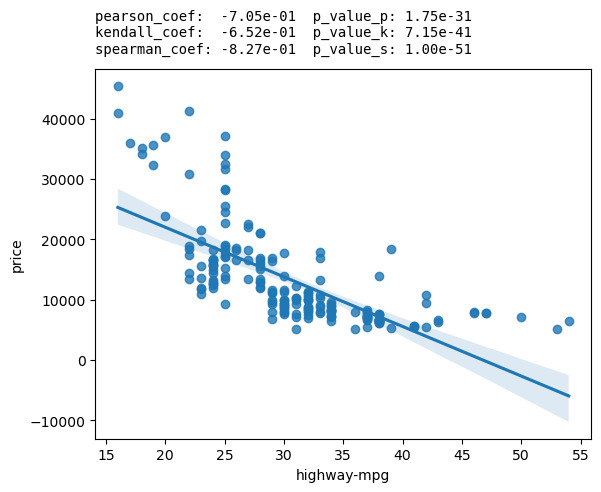

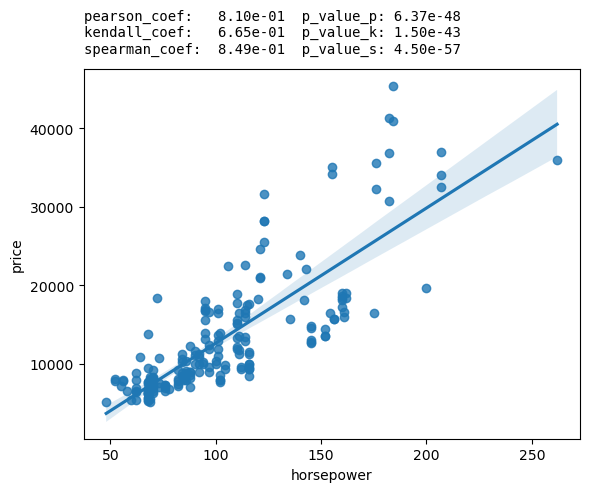

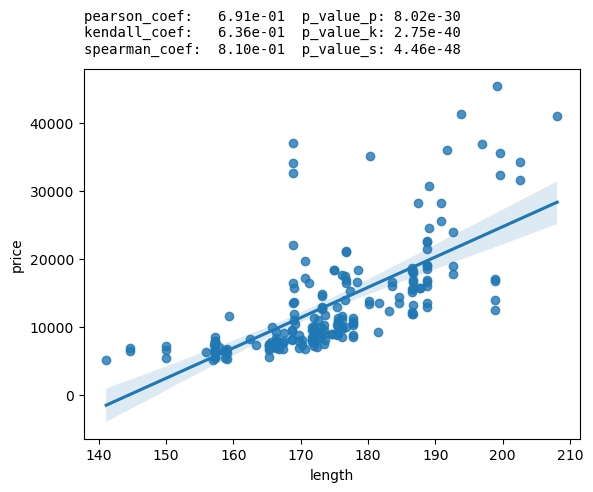

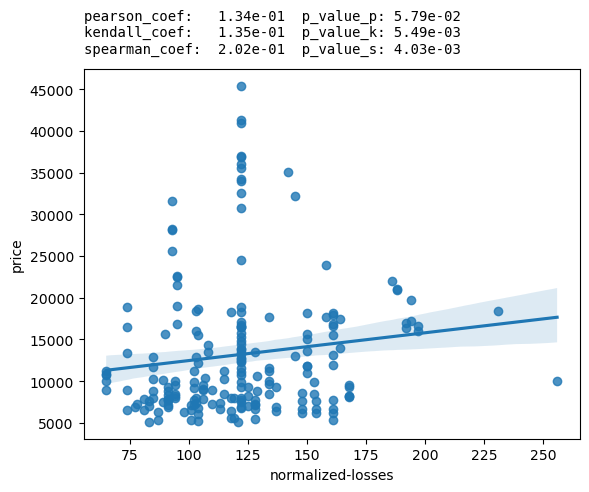

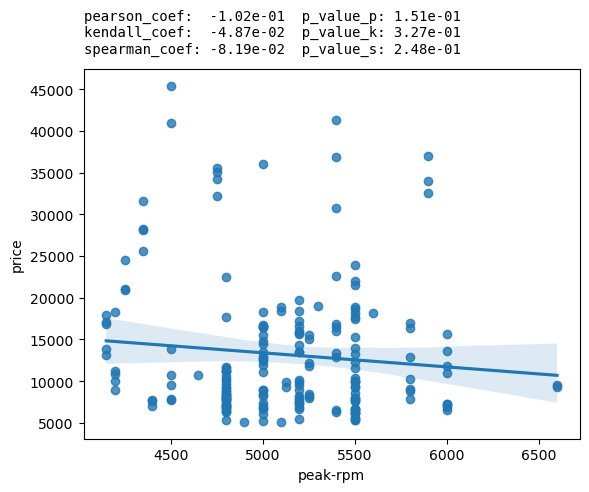

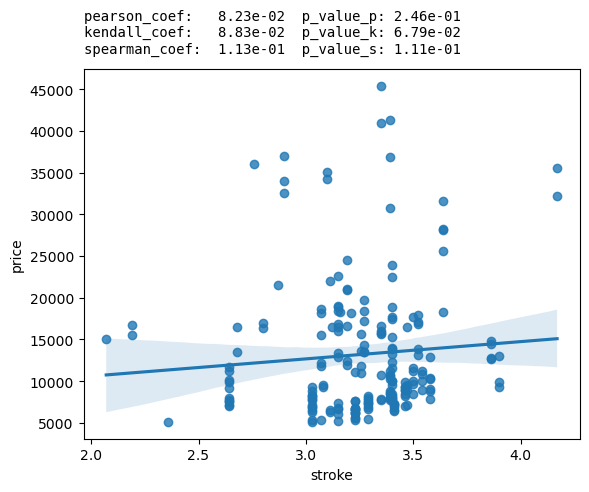

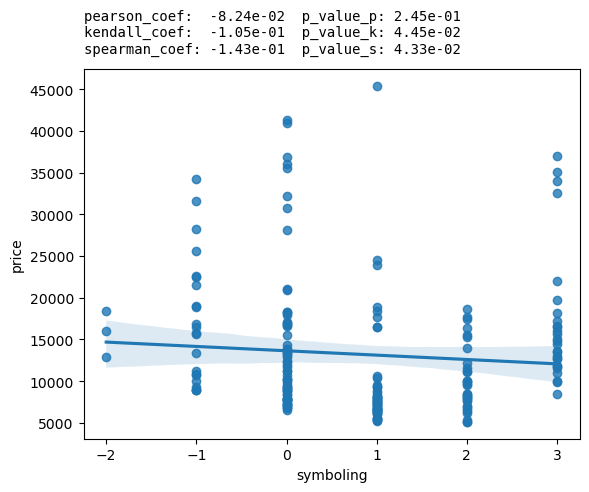

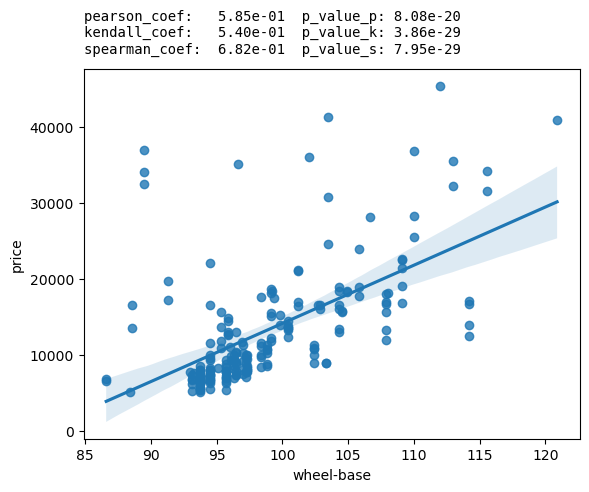

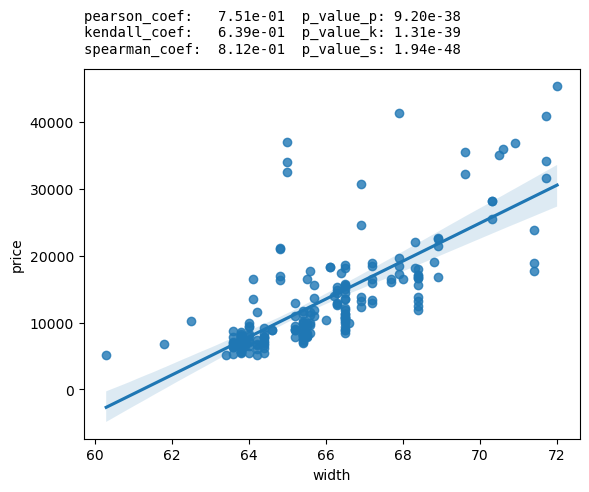

Statistically significant correlations (p_value < 0.001) price vs:
bore                   spearman   0.646  p-value: 4.03e-25
city-mpg               spearman  -0.831  p-value: 1.20e-52
curb-weight            spearman   0.914  p-value: 8.68e-80
engine-size            spearman   0.872  p-value: 9.27e-64
height                 kendall    0.182  p-value: 1.50e-04
highway-mpg            spearman  -0.827  p-value: 1.00e-51
horsepower             spearman   0.849  p-value: 4.50e-57
length                 spearman   0.810  p-value: 4.46e-48
wheel-base             kendall    0.540  p-value: 3.86e-29
width                  spearman   0.812  p-value: 1.94e-48


In [14]:
from scipy import stats
p_values = list()
cols = list(df.select_dtypes(exclude='object'))
cols.remove('price')
for col in sorted(cols):
    fig, ax = plt.subplots()
    sns.regplot(x=col, y='price', data=df, x_ci='sd')
    pearson = stats.pearsonr(df[col], df['price']) + ('spearman',)
    kendall = stats.kendalltau(df[col], df['price']) + ('kendall',)
    spearman = stats.spearmanr(df[col], df['price']) + ('spearman',)
    # print('pearson:', pearson[0])
    annotation = (
        f"pearson_coef:  {pearson[0]:9.2e}  p_value_p: {pearson[1]:.2e}\n"
        f"kendall_coef:  {kendall[0]:9.2e}  p_value_k: {kendall[1]:.2e}\n"
        f"spearman_coef: {spearman[0]:9.2e}  p_value_s: {spearman[1]:.2e}\n"
        )
    plt.text(s=annotation, x=0.00, y=1, transform=ax.transAxes, fontfamily='monospace')
    plt.show()
    plt.close()
    corr = [pearson, kendall, spearman]
    min_p = min(corr[i][1] for i in range(len(corr)))
    min_c = next(item[0] for item in corr if item[1] == min_p)
    min_n = next(item[2] for item in corr if item[1] == min_p)
    if min_p < 0.001:
        p_values.append({col : [min_n, min_c, min_p]})
print('Statistically significant correlations (p_value < 0.001) price vs:')
for p in p_values:
    for k, v in p.items():
        print(f"{k:<22} {v[0]:<9} {v[1]:>6.3f}  p-value: {v[2]:.2e}")

### P-values ranges:
P-value will tell us how certain we are about the correlation that we calculated.  
p-value < 0.001	- strong certainty in the result  
p-value < 0.05	- moderate certainty in the result  
p-value < 0.1	- weak certainty in the result  
p-value > 0.1	- no certainty in the result   

According to data from above following numerical columns will be used as predictors:
Column name | Coef name | Coef value | P-value    
-- | -- | -- | --
bore                  | spearman |  0.646 | 4.03e-25  
city-mpg              | spearman | -0.831 | 1.20e-52  
curb-weight           | spearman |  0.914 | 8.68e-80  
engine-size           | spearman |  0.872 | 9.27e-64  
height                | kendall  |  0.182 | 1.50e-04  
highway-mpg           | spearman | -0.827 | 1.00e-51  
horsepower            | spearman |  0.849 | 4.50e-57  
length                | spearman |  0.810 | 4.46e-48  
wheel-base            | kendall  |  0.540 | 3.86e-29  
width                 | spearman |  0.812 | 1.94e-48  

### Object columns - Check data
Check unique values in object type columns

In [15]:
w1, w2, w3, w4 = 18, 6, 4, 4
print('unique value counts:')
print(f"{'':<{w1}} {'unique':<{w2}} {'max':<{w3}} {'min':<{w4}}")

for col in df.select_dtypes(include='object'):
    max_v = df[col].value_counts().max()
    min_v = df[col].value_counts().min()
    print(f"{col:<{w1}} {len(df[col].value_counts()):<{w2}} {max_v:<{w3}} {min_v:<{w4}}")

unique value counts:
                   unique max  min 
make               22     32   1   
fuel-type          2      181  20  
aspiration         2      165  36  
num-of-doors       2      115  86  
body-style         5      94   6   
drive-wheels       3      118  8   
engine-location    2      198  3   
engine-type        6      145  4   
num-of-cylinders   7      157  1   
fuel-system        8      92   1   


Check object columns whether they could be used for price prediction using polynomial regression

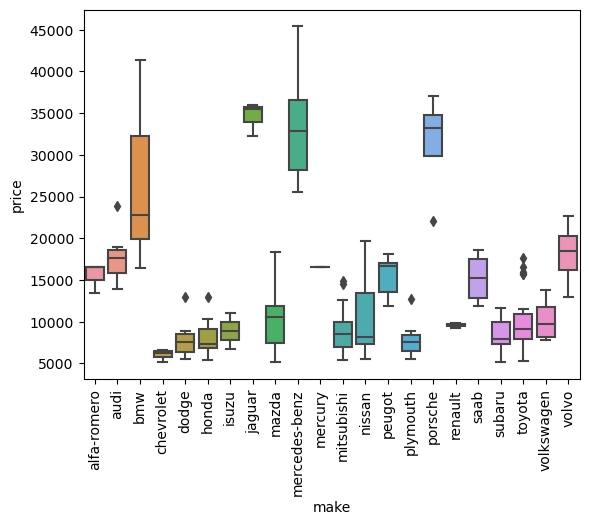

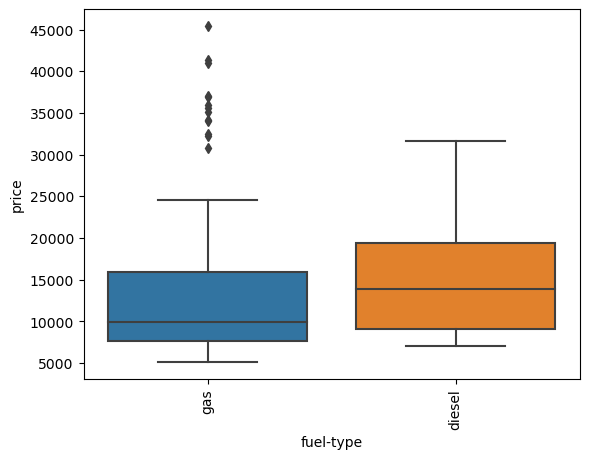

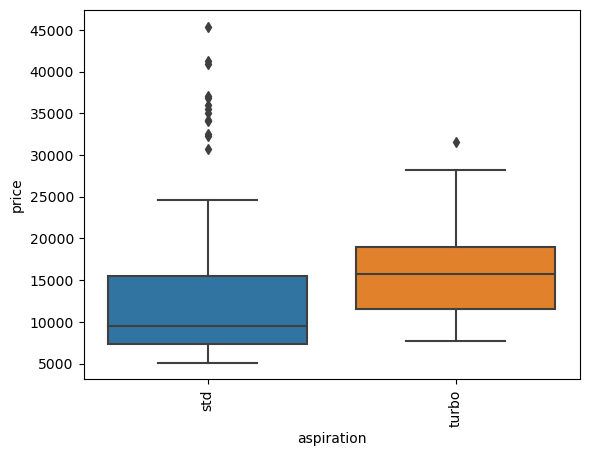

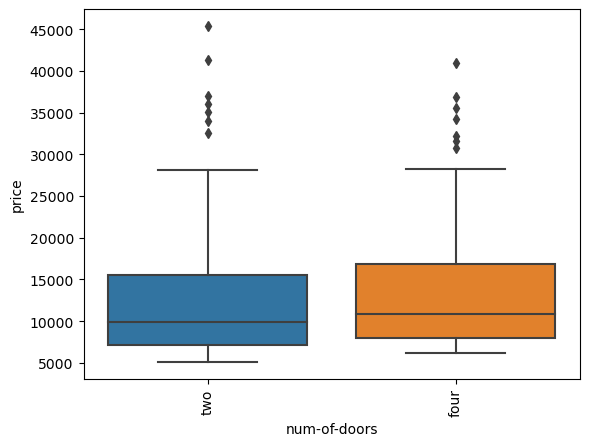

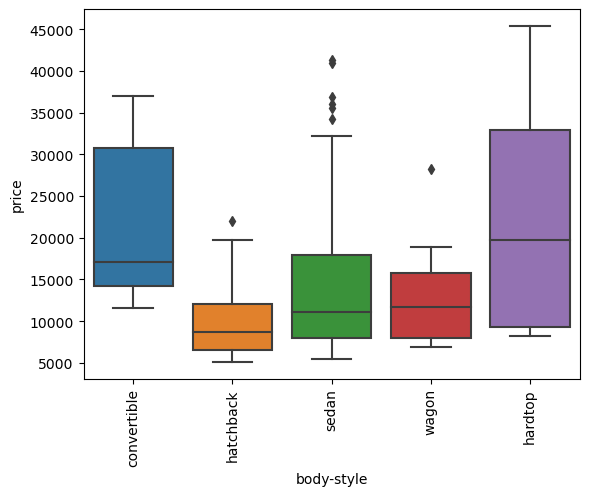

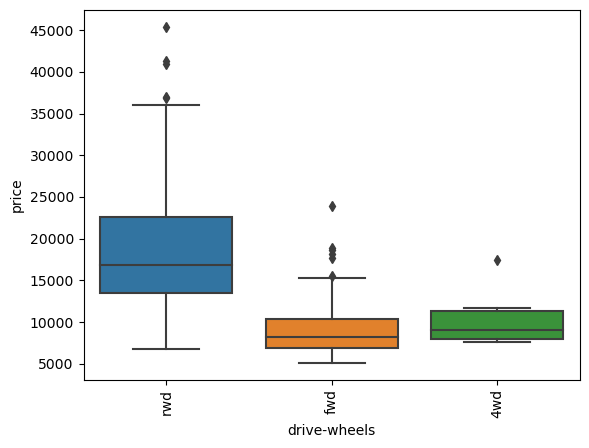

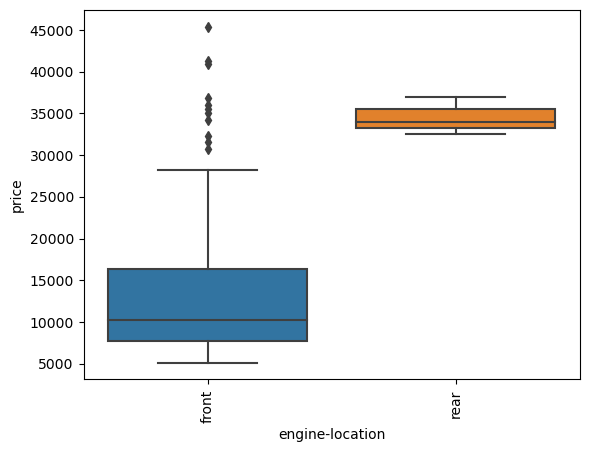

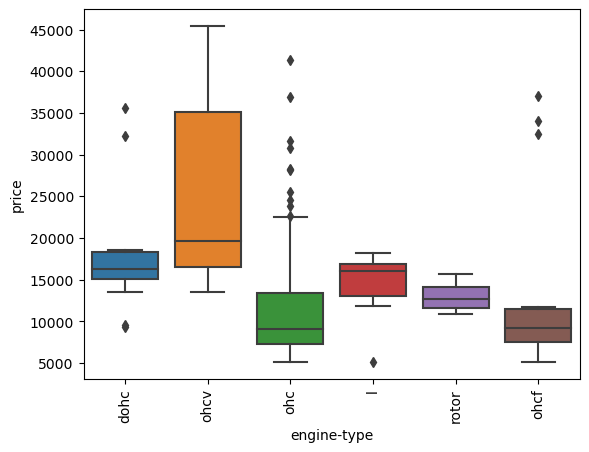

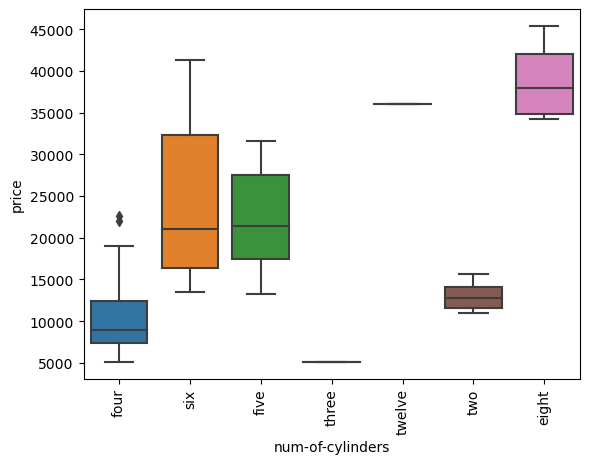

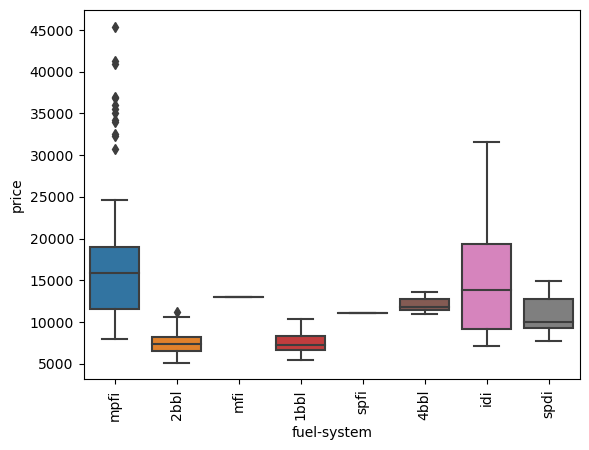

In [16]:
for col in df.select_dtypes(include='object'):
    plt.figure()
    current_plot = sns.boxplot(x=col, y='price', data=df)
    current_plot.set_xticklabels(current_plot.get_xticklabels(), rotation=90)
    plt.show()
    plt.close()

### Object columns - ANOVA (Analysis of Variance)
- group elements
- calculate F-test and p-value

In [17]:
for col in df.select_dtypes(include='object'):
    print(col)

make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system


### Object columns - ANOVA - for one colum
Create DataFrameGroupBy object for specified column from main data frame

In [18]:
col_name = 'fuel-type'
col_v = 'diesel'
df_g = df[[col_name, 'price']].groupby([col_name])
print('df_g.head():\n', df_g.head(2))
print(f"\n\ndf_g.get_group('{col_v}')['price']:\n", df_g.get_group(col_v)['price'].head(), sep='')

df_g.head():
    fuel-type    price
0        gas  13495.0
1        gas  16500.0
63    diesel  10795.0
66    diesel  18344.0


df_g.get_group('diesel')['price']:
63    10795.0
66    18344.0
67    25552.0
68    28248.0
69    28176.0
Name: price, dtype: float64


Calculate F-test and p-value for specified values

In [19]:
# v1 manual
import scipy.stats as stats
val_1 = 'gas'
val_2 = 'diesel'

f_val, p_val = stats.f_oneway(
    df_g.get_group(val_1)['price'], 
    df_g.get_group(val_2)['price'],
)
print(f"F-test: {f_val:.3f}  p-value: {p_val:.2e}")

F-test: 2.452  p-value: 1.19e-01


In [20]:
# v2 with automation
vals = ['gas', 'diesel']
df_g_g = [df_g.get_group(val)['price'] for val in vals]
f_val_t, p_val_t = stats.f_oneway(*df_g_g)
print(f"F-test: {f_val_t:.3f}  p-value: {p_val_t:.2e}")

F-test: 2.452  p-value: 1.19e-01


p-value = 0.119 is grater then 0.05 indicates that there is no significant difference between these two groups.  
f-test = 2.452 indicates how large the difference between gas and diesel

### Object columns - ANOVA - for multiple columns
Create dict with columns names from main data frame as a key and corresponded DataFrameGroupBy object as a value for all object columns from main data frame

In [21]:
df_gs = dict()
for col in df.select_dtypes(include='object'):
    df_gs.setdefault(col, df[[col, 'price']].groupby([col]))

for k, v in df_gs.items():
    print(k)
    print(v.head(2))
    print()

make
              make    price
0      alfa-romero  13495.0
1      alfa-romero  16500.0
3             audi  13950.0
4             audi  17450.0
10             bmw  16430.0
11             bmw  16925.0
18       chevrolet   5151.0
19       chevrolet   6295.0
21           dodge   5572.0
22           dodge   6377.0
30           honda   6479.0
31           honda   6855.0
43           isuzu   6785.0
46           isuzu  11048.0
47          jaguar  32250.0
48          jaguar  35550.0
50           mazda   5195.0
51           mazda   6095.0
67   mercedes-benz  25552.0
68   mercedes-benz  28248.0
75         mercury  16503.0
76      mitsubishi   5389.0
77      mitsubishi   6189.0
89          nissan   5499.0
90          nissan   7099.0
107         peugot  11900.0
108         peugot  13200.0
118       plymouth   5572.0
119       plymouth   7957.0
125        porsche  22018.0
126        porsche  32528.0
130        renault   9295.0
131        renault   9895.0
132           saab  11850.0
133           s

Calculate and print f-test and p-value for all groups together and pairwise comparisons between specific groups

In [22]:
from itertools import combinations

for col, grouped_values in df_gs.items():
    values = grouped_values.aggregate(lambda x: ','.join(map(str, x))).index
    df_gg = [grouped_values.get_group(val)['price'] for val in values]
    f_value_i, p_value_i = stats.f_oneway(*df_gg)
    print(f"{col:<16}  F-test: {f_value_i:>6.3f}  p-value: {p_value_i:.2e}  {['Y', 'N'][int(p_value_i>0.05)]}")
    if len(values) > 2:
        pairs = list(combinations(values, 2))
        for pair in pairs:
            df_gg_i = [grouped_values.get_group(val)['price'] for val in pair]
            f_value_i_i, p_value_i_i = stats.f_oneway(*df_gg_i)
            print(f"    {' - '.join(pair):<30}  F-test: {f_value_i_i:>7.3f}   p-value: {p_value_i_i:.2e}  {['Y', 'N'][int(p_value_i_i>0.05)]}")
    print()


make              F-test: 33.232  p-value: 1.07e-50  Y
    alfa-romero - audi              F-test:   1.189   p-value: 3.12e-01  N
    alfa-romero - bmw               F-test:   3.650   p-value: 8.84e-02  N
    alfa-romero - chevrolet         F-test:  75.508   p-value: 9.66e-04  Y
    alfa-romero - dodge             F-test:  28.918   p-value: 3.11e-04  Y
    alfa-romero - honda             F-test:  32.009   p-value: 5.91e-05  Y
    alfa-romero - isuzu             F-test:  10.324   p-value: 4.88e-02  Y
    alfa-romero - jaguar            F-test: 151.978   p-value: 2.49e-04  Y
    alfa-romero - mazda             F-test:   4.162   p-value: 5.63e-02  N
    alfa-romero - mercedes-benz     F-test:  19.676   p-value: 1.63e-03  Y
    alfa-romero - mercury           F-test:   0.251   p-value: 6.66e-01  N
    alfa-romero - mitsubishi        F-test:  11.411   p-value: 4.51e-03  Y
    alfa-romero - nissan            F-test:   3.639   p-value: 7.17e-02  N
    alfa-romero - peugot            F-test:  

/Users/zwar/opt/miniconda3/envs/env_coursera_lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/Users/zwar/opt/miniconda3/envs/env_coursera_lab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


Print only results with both all groups together and all pairwise comparisons between specific groups p-values < 0.05

In [23]:
from itertools import combinations

for col, grouped_values in df_gs.items():
    values = grouped_values.aggregate(lambda x: ','.join(map(str, x))).index
    df_gg = [grouped_values.get_group(val)['price'] for val in values]
    f_value_i, p_value_i = stats.f_oneway(*df_gg)
    flag = True
    if p_value_i<0.05:
        text = list()
        text.append(f"{col:<16}  F-test: {f_value_i:>6.3f}  p-value: {p_value_i:.2e}  {['Y', 'N'][int(p_value_i>0.05)]}")
        if len(values) > 2:
            pairs = list(combinations(values, 2))
            for pair in pairs:
                df_gg_i = [grouped_values.get_group(val)['price'] for val in pair]
                f_value_i_i, p_value_i_i = stats.f_oneway(*df_gg_i)
                if p_value_i_i > 0.05:
                    flag = False
                    break
                else:
                    text.append(f"    {' - '.join(pair):<15}  F-test: {f_value_i_i:>7.3f}   p-value: {p_value_i_i:.2e}  {['Y', 'N'][int(p_value_i_i>0.05)]}")
        if flag:
            for elem in text:
                print(elem)

aspiration        F-test:  6.631  p-value: 1.07e-02  Y
engine-location   F-test: 24.496  p-value: 1.58e-06  Y


According to f-tests and p-values analysis of all group together and pairwise comparison as p-value larger then 0.05 indicates that there is no significant difference between groups so we can try to use following categorical columns as predictors:
- aspiration 
- engine-location

### Object columns - convert to dummies

In order to use categorical columns as predictors we convert them to dummies

In [24]:
col_names = ['aspiration', 'engine-location']
for col in col_names:
    if col in df.columns:
        d_names = {name : f"{col}_{name}" for name in df[col].unique()}
        d_cols = pd.get_dummies(df[col])
        d_cols.rename(columns=d_names, inplace=True)
        df = pd.concat([df, d_cols], axis=1)
        df.drop(col, axis=1, inplace=True)
print(df.dtypes)

symboling                  int64
normalized-losses        float64
make                      object
fuel-type                 object
num-of-doors              object
body-style                object
drive-wheels              object
wheel-base               float64
length                   float64
width                    float64
height                   float64
curb-weight                int64
engine-type               object
num-of-cylinders          object
engine-size                int64
fuel-system               object
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
aspiration_std             uint8
aspiration_turbo           uint8
engine-location_front      uint8
engine-location_rear       uint8
dtype: object


### Check correlation matrix

In [25]:
X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
X.corr()

,bore,city-mpg,curb-weight,engine-size,height,highway-mpg,horsepower,length,wheel-base,width,aspiration_std,aspiration_turbo,engine-location_front,engine-location_rear
bore,1.000000,-0.582027,0.644060,0.572609,0.180449,-0.591309,0.566936,0.608971,0.493244,0.544885,-0.227816,0.227816,-0.188413,0.188413
city-mpg,-0.582027,1.000000,-0.749543,-0.650546,-0.049800,0.972044,-0.822214,-0.665192,-0.470606,-0.633531,0.189237,-0.189237,0.157132,-0.157132
curb-weight,0.644060,-0.749543,1.000000,0.849072,0.307581,-0.794889,0.757976,0.880665,0.782097,0.866201,-0.321955,0.321955,-0.051287,0.051287
engine-size,0.572609,-0.650546,0.849072,1.000000,0.074694,-0.679571,0.822676,0.685025,0.572027,0.729436,-0.110040,0.110040,-0.199367,0.199367
height,0.180449,-0.049800,0.307581,0.074694,1.000000,-0.104812,-0.087027,0.492063,0.590742,0.306002,-0.090336,0.090336,0.109225,-0.109225
highway-mpg,-0.591309,0.972044,-0.794889,-0.679571,-0.104812,1.000000,-0.804575,-0.698142,-0.543304,-0.680635,0.241851,-0.241851,0.102964,-0.102964
horsepower,0.566936,-0.822214,0.757976,0.822676,-0.087027,-0.804575,1.000000,0.579821,0.371147,0.615077,-0.251127,0.251127,-0.342117,0.342117
length,0.608971,-0.665192,0.880665,0.685025,0.492063,-0.698142,0.579821,1.000000,0.876024,0.857170,-0.230085,0.230085,0.053086,-0.053086
wheel-base,0.493244,-0.470606,0.782097,0.572027,0.590742,-0.543304,0.371147,0.876024,1.000000,0.814507,-0.256889,0.256889,0.189115,-0.189115
width,0.544885,-0.633531,0.866201,0.729436,0.306002,-0.680635,0.615077,0.857170,0.814507,1.000000,-0.305732,0.305732,0.052205,-0.052205


According to result of .corr() we can remove following columns:
- 'engine-location_rear' - low correlation coefficients with other variables, indicating a weak linear relationship with the target.
- 'engine-location_front' - low correlation coefficients with other variables, indicating a weak linear relationship with the target.
- 'aspiration_std' - low correlation coefficients with other variables, indicating a weak linear relationship with the target.
- 'aspiration_turbo' - low correlation coefficients with other variables, indicating a weak linear relationship with the target.
- 'height' - generally low correlation coefficients with other variables

### Multiple Linear Regression

Check different variations of predictors and calculate R^2:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import itertools
x = ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']
Y = df[['price']]
for i in range(0, len(x)-1):
    for j in range(1, len(x)-i):
        x_i = x[i:-j]
        lm = LinearRegression()
        lm.fit(df[x_i], Y)
        Y_hat = lm.predict(df[x_i])
        mse = mean_squared_error(Y, Y_hat)
        r2 = r2_score(Y, Y_hat)
        print('MSE =', f'{mse:>11.1f}', 'R^2 =', f'{r2:<5.2f}', x_i)

MSE =   8995514.3 R^2 = 0.86  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front']
MSE =  11124622.6 R^2 = 0.82  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo']
MSE =  11124622.6 R^2 = 0.82  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std']
MSE =  11198904.6 R^2 = 0.82  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width']
MSE =  11640902.9 R^2 = 0.81  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base']
MSE =  11772681.5 R^2 = 0.81  ['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'leng

According to comparing R^2 of different combinations of predictors it's better to keep all columns even if 'engine-location_rear', 'engine-location_front', 'aspiration_turbo' and 'height' show low correlation coefficients with other variables as it was seen when we used .corr()

Build multiple linear regression using whole data, plot distribution of model and data and calculate MSE with R^2

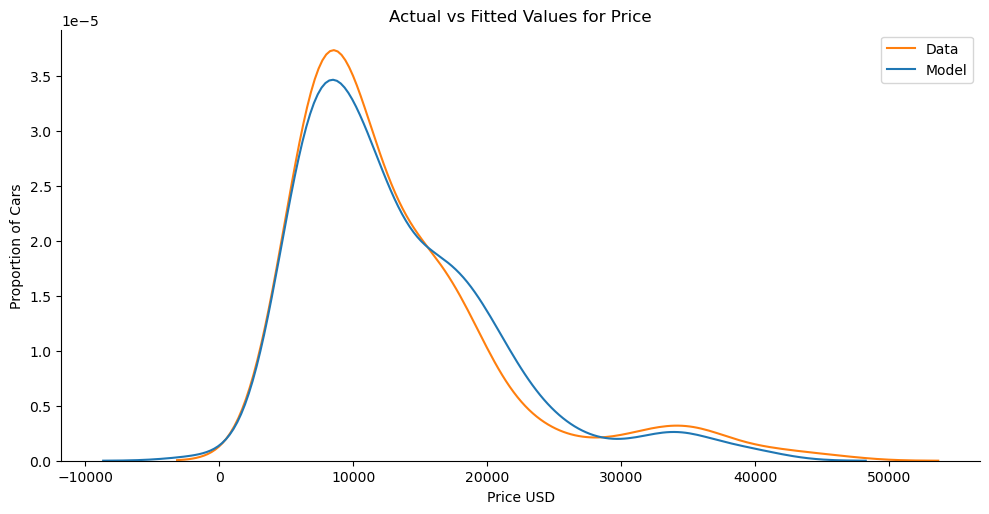

MSE = 8995514.3
R^2 = 0.86


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width']]
X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
Y_hat = lm.predict(X)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), Y]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)
print('MSE =', f'{mse:.1f}')
print('R^2 =', f'{r2:.2f}')

Split data for train and test batches

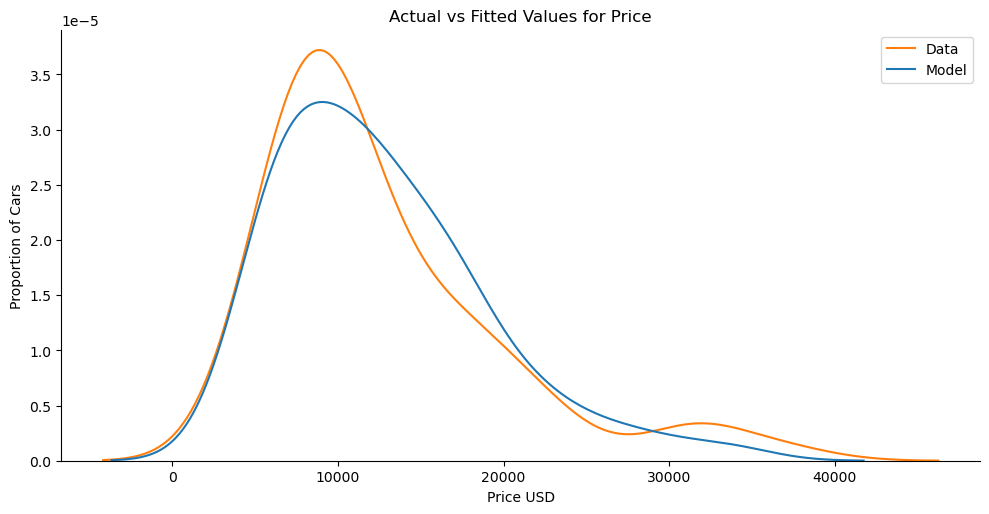

MSE = 8416912.7
R^2 = 0.83


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
Y_hat = lm.predict(x_test)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), y_test]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)
print('MSE =', f'{mse:.1f}')
print('R^2 =', f'{r2:.2f}')

Proceed through cross-validation and calculate R^2 with mean R^2 of all folds

In [31]:
from sklearn.model_selection import cross_val_score

y_hat_cross = cross_val_score(
    lr, 
    X=x_train, 
    y=y_train, 
    cv=5,
    scoring=None
)
print('R^2 for all folds:\n', [f"{elem:.2f}" for elem in y_hat_cross])
print('Mean R^2 for all folds =', f"{y_hat_cross.mean():.2f}")

R^2 for all folds:
 ['0.78', '0.93', '0.78', '0.69', '0.91']
Mean R^2 for all folds = 0.82


```Важно! Перед использованием стандардизации необходимо убедиться, что СКО столбца != 0 иначе будут неверные результаты. Потенциально такое может случиться со столбцами dummies, поксольку там содержаться бинарные данные и мы легко можем получить только 0 или только 1, когда разбиваем данные на выборку для построения модели и на выборку для теста модели  и в этом случае, СКО = 0, т.к. СКО = (sum((x_i - x_mean)^2)/N) и если все x_i одинаковы, то они равны x_mean => СКО = 0```

Normalize and standardize features with StandardScaler(). Build multiple linear regression using train data.  Plot distribution of model and data and calculate MSE with R^2  
Using Pipe

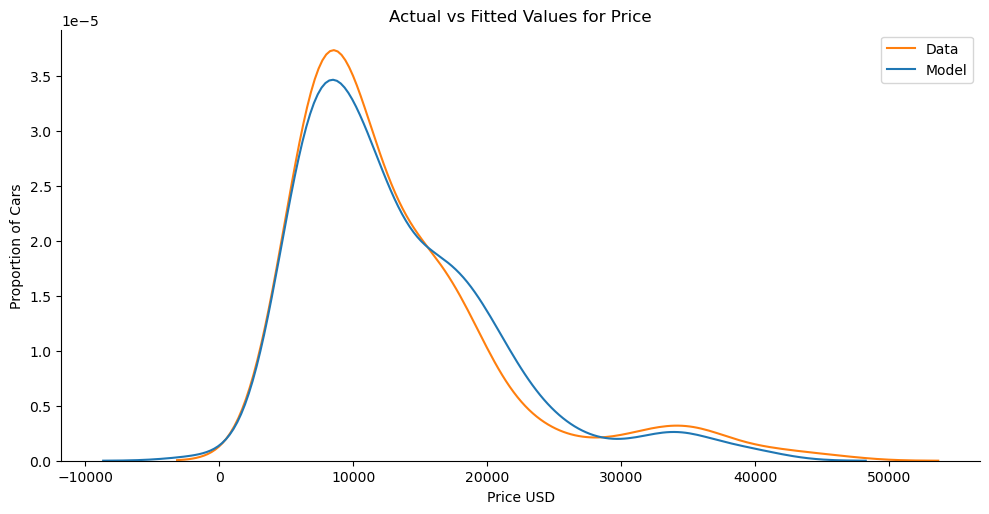

MSE = 8995514.3
R^2 = 0.86


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]

Input=[
    ('scale', StandardScaler()),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(X, Y)
Y_hat = pipe.predict(X)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), Y]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)
print('MSE =', f'{mse:.1f}')
print('R^2 =', f'{r2:.2f}')

Normalize and standardize features with ```(X - X.mean())/X.std()```

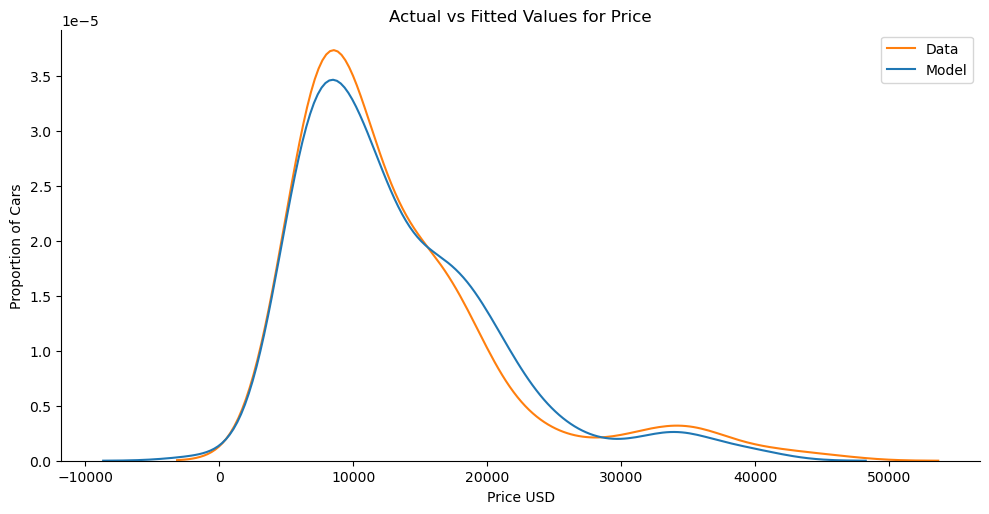

MSE = 8995514.3
R^2 = 0.86


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]
X_scale = (X - X.mean())/X.std()

lr = LinearRegression()
lr.fit(X_scale, Y)
Y_hat = lr.predict(X_scale)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), Y]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)
print('MSE =', f'{mse:.1f}')
print('R^2 =', f'{r2:.2f}')

Normalize features. Split data for train and test batches. Build multiple linear regression using train data.  Plot distribution of model and data and calculate MSE with R^2.  
**Using Pipe.**

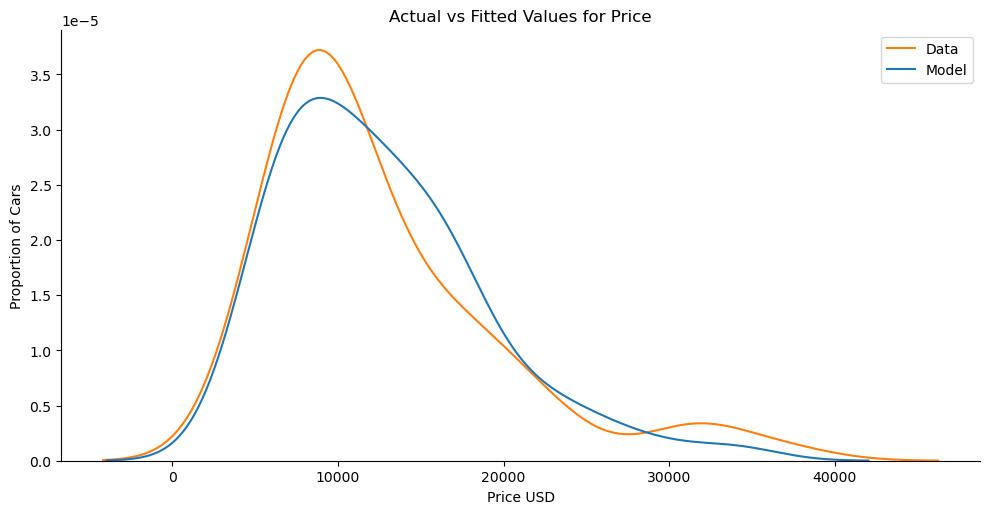

MSE = 9415256.2
R^2 = 0.81
R^2 for all folds:
 ['0.78', '0.93', '0.78', '0.69', '0.91']
Mean R^2 for all folds = 0.82


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Input=[
    ('scale', StandardScaler()),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
Y_hat = pipe.predict(x_test)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), y_test]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)
print('MSE =', f'{mse:.1f}')
print('R^2 =', f'{r2:.2f}')

y_hat_cross = cross_val_score(
    pipe,
    X=x_train, 
    y=y_train, 
    cv=5,
    scoring=None
)
print('R^2 for all folds:\n', [f"{elem:.2f}" for elem in y_hat_cross])
print('Mean R^2 for all folds =', f"{y_hat_cross.mean():.2f}")

### Multiple Polynomial Regression - R^2 vs polynomial power

Go through different polynomial power, calculate R^2 and plot the chart R^2 vs polynomial power.  
**No standardization and no normalization**

power= 1 R^2= 8.57e-01
power= 2 R^2= 9.54e-01
power= 3 R^2= 9.99e-01
power= 4 R^2= 9.99e-01
power= 5 R^2= 9.99e-01
power= 6 R^2= 9.99e-01
power= 7 R^2= 9.99e-01
power= 8 R^2= 9.98e-01
power= 9 R^2= 9.99e-01


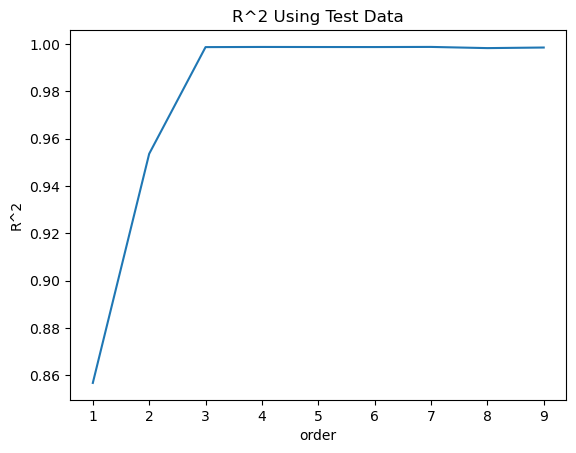

In [58]:
X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]

R2_test = dict()
max_power = 10
powers = [num for num in range(1, max_power)]

for p in powers:
    pr = PolynomialFeatures(degree=p)
    X_pr = pr.fit_transform(X)
    lr.fit(X_pr, Y)
    R2_test.setdefault(p, lr.score(X_pr, Y))

plt.plot(powers, R2_test.values())
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data') 
for k, v in R2_test.items():
    print('power=', k, 'R^2=', f"{v:.2e}")

Split data set to train and test data. Go through different polynomial power, calculate R^2 and plot the chart R^2 vs polynomial power.  
**No standardization and no normalization**

NaN in x_train: False
NaN in x_test: False
power= 1 R^2= 7.70e-01
power= 2 R^2= 2.78e-01
power= 3 R^2= -3.91e+06
power= 4 R^2= -4.53e+08
power= 5 R^2= -1.25e+09
power= 6 R^2= -4.71e+09
power= 7 R^2= -4.59e+09
power= 8 R^2= -6.36e+10
power= 9 R^2= -7.86e+10


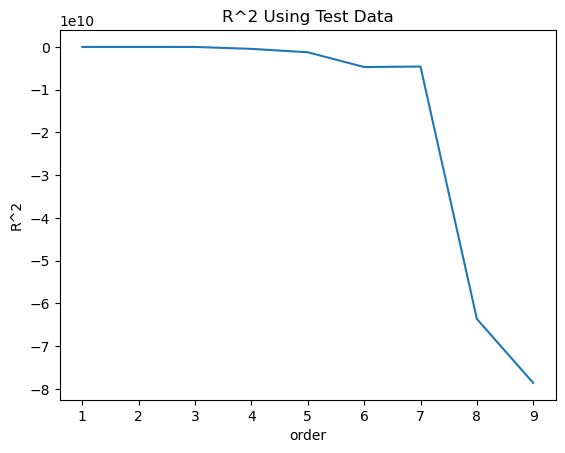

In [63]:
X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

# check if we have NaNs in dummies columns
print('NaN in x_train:', np.isnan(x_train.values).any())
print('NaN in x_test:', np.isnan(x_test.values).any())

R2_test = dict()
max_power = 10
powers = [num for num in range(1, max_power)]

for p in powers:
    pr = PolynomialFeatures(degree=p)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)    
    lr.fit(x_train_pr, y_train)
    R2_test.setdefault(p, lr.score(x_test_pr, y_test))

plt.plot(powers, R2_test.values())
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
for k, v in R2_test.items():
    print('power=', k, 'R^2=', f"{v:.2e}")

I experimented with different random_state parameter in tran_test_split() and always got different results witch is predictable as the amount of data is not that large (only 205 rows) and we have two dummy columns with zeros and ones what would have quite high influence on result in case of splitting data.

So we use result from first test with no splitting and chose polynomial degree = 3 for further investigation

### Multiple Polynomial Regression
Build multiple polynomial regression using whole data, pipe, standard scaler (should be ok as we don't split data so dummy columns will not provide standard deviation = 0). Plot distribution of model and data and calculate MSE with R^2  
Calculate Cross-validation

No data splitting

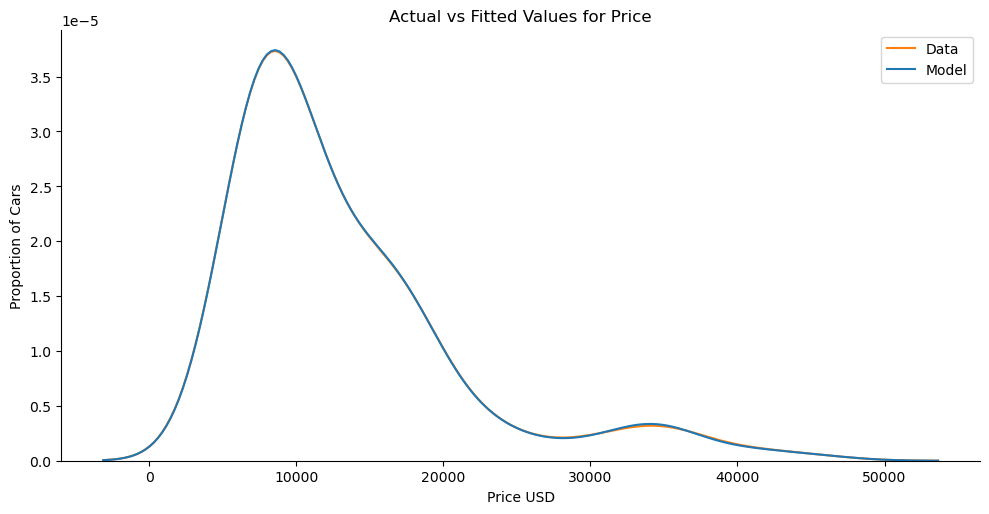

MSE = 8.37e+04
R^2 = 9.99e-01
Cross-validation
R^2 for all folds:
 ['-2.92e+18', '-1.61e+19', '-2.79e+17', '-4.79e+19', '-6.41e+19']
Mean R^2 for all folds = -2.62e+19


In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
Y = df[['price']]

# lr = LinearRegression()
# lr.fit(x_train, y_train)
# Y_hat = lm.predict(x_test)

Input=[
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(X, Y)
Y_hat = pipe.predict(X)

sns.displot(
    data=pd.concat([pd.DataFrame(Y_hat), Y]), 
    kind='kde',
    legend=False,
    height=5,
    aspect=2
)

plt.title('Actual vs Fitted Values for Price')
plt.legend(
    loc = 'upper right',
    labels = ['Data', 'Model']
)
plt.xlabel('Price USD')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)
print('MSE =', f'{mse:.2e}')
print('R^2 =', f'{r2:.2e}')

print('Cross-validation')
y_hat_cross = cross_val_score(
    pipe,
    X=X, 
    y=Y, 
    cv=5,
    scoring=None
)
print('R^2 for all folds:\n', [f"{elem:.2e}" for elem in y_hat_cross])
print('Mean R^2 for all folds =', f"{y_hat_cross.mean():.2e}")

So polynomial degree = 3 suits very well for this data set, the R^2 value is very close to 1 after training the model.  
However, during cross-validation, the results are poor due to the limited size of the dataset (only 205 rows) and the presence of dummy columns.

With splitting data

```not sure if i need it this ⬇︎  in this study 🤔```

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.model_selection import cross_val_score

# X = df[['bore', 'city-mpg', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'wheel-base', 'width', 'aspiration_std', 'aspiration_turbo', 'engine-location_front', 'engine-location_rear']]
# Y = df[['price']]
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# # lr = LinearRegression()
# # lr.fit(x_train, y_train)
# # Y_hat = lm.predict(x_test)

# Input=[
#     ('scale', StandardScaler()),
#     ('polynomial', PolynomialFeatures(degree=3)),
#     ('model', LinearRegression())
# ]
# pipe = Pipeline(Input)
# pipe.fit(x_train, y_train)
# Y_hat = pipe.predict(x_test)

# sns.displot(
#     data=pd.concat([pd.DataFrame(Y_hat), y_test]), 
#     kind='kde',
#     legend=False,
#     height=5,
#     aspect=2
# )

# plt.title('Actual vs Fitted Values for Price')
# plt.legend(
#     loc = 'upper right',
#     labels = ['Data', 'Model']
# )
# plt.xlabel('Price USD')
# plt.ylabel('Proportion of Cars')

# plt.show()
# plt.close()

# mse = mean_squared_error(y_test, Y_hat)
# r2 = r2_score(y_test, Y_hat)
# print('MSE =', f'{mse:.1f}')
# print('R^2 =', f'{r2:.2f}')

# y_hat_cross = cross_val_score(
#     pipe,
#     X=x_train, 
#     y=y_train, 
#     cv=5,
#     scoring=None
# )
# print('R^2 for all folds:\n', [f"{elem:.2f}" for elem in y_hat_cross])
# print('Mean R^2 for all folds =', f"{y_hat_cross.mean():.2f}")